intro

In [2]:
"""Conexión a la base de datos"""

import pandas
import sqlalchemy
import keyboard
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


def create_database_connection(user, password, host, database_name):
    try:
        engine = sqlalchemy.create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database_name}")
        connection = engine.connect()
        print("\nConexión a la base de datos establecida con éxito.\n")
        return engine, connection
    except Exception as e:
        print("\nError en la conexión a la base de datos:\n", e)
        return None, None

def get_table_names(engine):
    inspector = sqlalchemy.inspect(engine)
    table_names = inspector.get_table_names()
    if table_names:
        print("Tablas encontradas en la base de datos:", table_names)
    else:
        print(f"Ninguna tabla encontrada en la base de datos.\n\nSalida del programa")  
    return table_names

def load_tables_into_dataframes(connection, table_names):
    for table_name in table_names:
        query = f"SELECT * FROM {table_name}"
        globals()[f"df_{table_name}"] = pandas.read_sql(query, connection)
        print(f"\nDatos cargados para la tabla: {table_name}")  # Stampa per verificare

def display_dataframes(table_names):
    print("\nContenido de las tablas:")
    for table_name in table_names:
        df_name = f"df_{table_name}"
        df = globals()[df_name]
        
        print("\n**************************************\n**************************************")
        print(f"Tabla: {table_name}")
        print("\n**************************************\n**************************************")
        print("\n***********Información general:***********\n")
        print(df.info(), "\n")        
        print("\n**********************Primeras 3 filas:**********************\n\n", df.head(3), "\n")
        print("\n**********************Últimas 3 filas:**********************\n\n", df.tail(3), "\n")

print("Programa para la conexión a una base de datos MySQL y la visualización de sus tablas en DataFrame utilizando la biblioteca Pandas.")
print("Presiona 'Esc' para salir.")

# Input de conexión
user = input("Introduce el nombre de usuario para la base de datos (ej: root)")
if not keyboard.is_pressed('esc'): password = getpass.getpass("Introduce la contraseña para la base de datos (ej:****)")
if not keyboard.is_pressed('esc'): host = input("Introduce el host de la base de datos (ej: localhost)")
if not keyboard.is_pressed('esc'): database_name = input("Introduce el nombre de la base de datos (ej: sprint_4_v2)")

# Connessione e caricamento delle tabelle
if not keyboard.is_pressed('esc'):
    engine, connection = create_database_connection(user, password, host, database_name)

    if connection:
        table_names = get_table_names(engine)

        if table_names:
            load_tables_into_dataframes(connection, table_names)
            display_dataframes(table_names)

if keyboard.is_pressed('esc'): 
    print("Salida del programa")



Programa para la conexión a una base de datos MySQL y la visualización de sus tablas en DataFrame utilizando la biblioteca Pandas.
Presiona 'Esc' para salir.

Conexión a la base de datos establecida con éxito.

Tablas encontradas en la base de datos: ['companies', 'credit_cards', 'products', 'transactions', 'users']

Datos cargados para la tabla: companies

Datos cargados para la tabla: credit_cards

Datos cargados para la tabla: products

Datos cargados para la tabla: transactions

Datos cargados para la tabla: users

Contenido de las tablas:

**************************************
**************************************
Tabla: companies

**************************************
**************************************

***********Información general:***********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    100 non-null    object
 

1.1 Visualización de una variable numérica


<Axes: xlabel='weight', ylabel='count'>

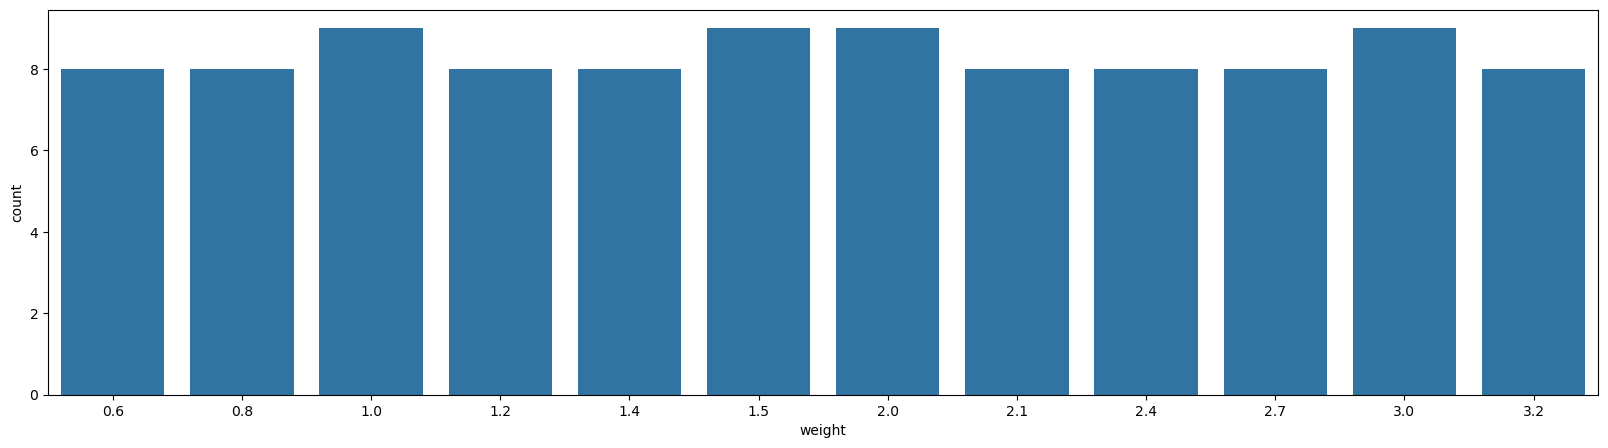

In [3]:
plt.figure(figsize=(20, 5))

sns.countplot(data=df_products,x='weight')

1.2 Visualización de dos variables numéricas

<Axes: xlabel='weight', ylabel='price_numeric'>

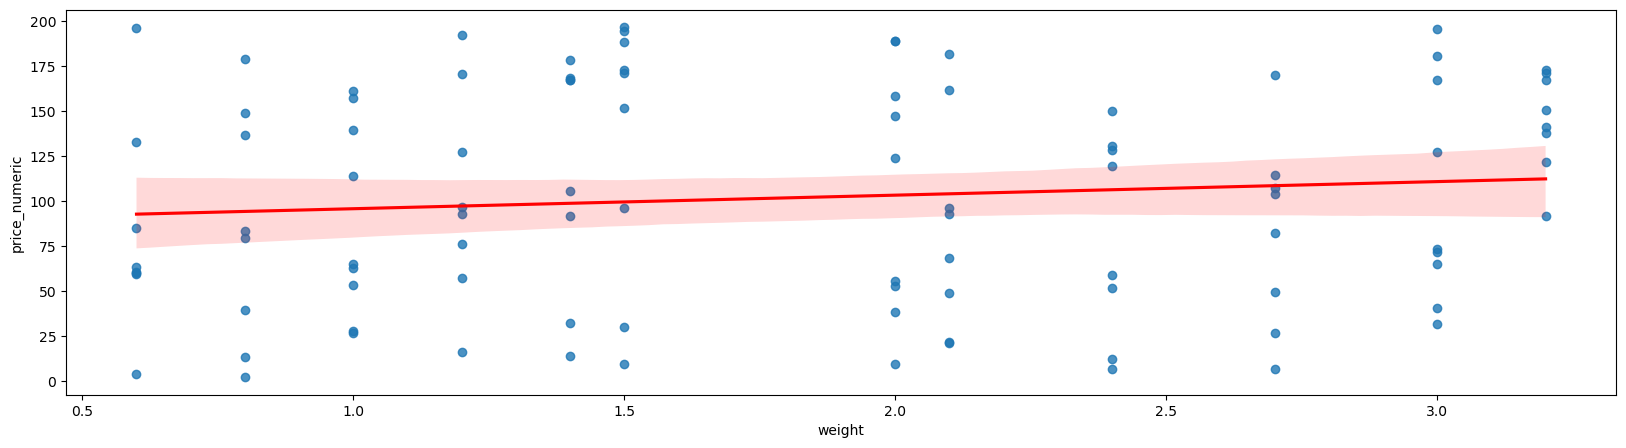

In [4]:
plt.figure(figsize=(20, 5))

df_products['price_numeric'] = df_products['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

sns.regplot(data=df_products,x='weight',y='price_numeric',line_kws={'color': 'red'})

1.3 Visualización de una variable categorica

<Axes: xlabel='country', ylabel='count'>

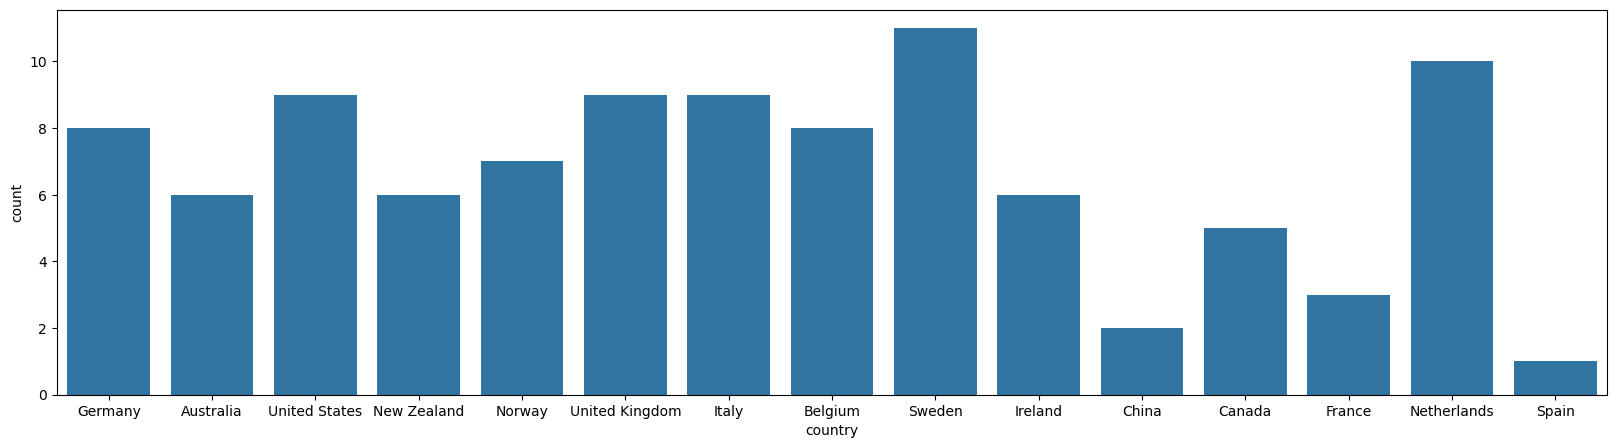

In [74]:
plt.figure(figsize=(20, 5))

sns.countplot(data=df_companies,x='country')

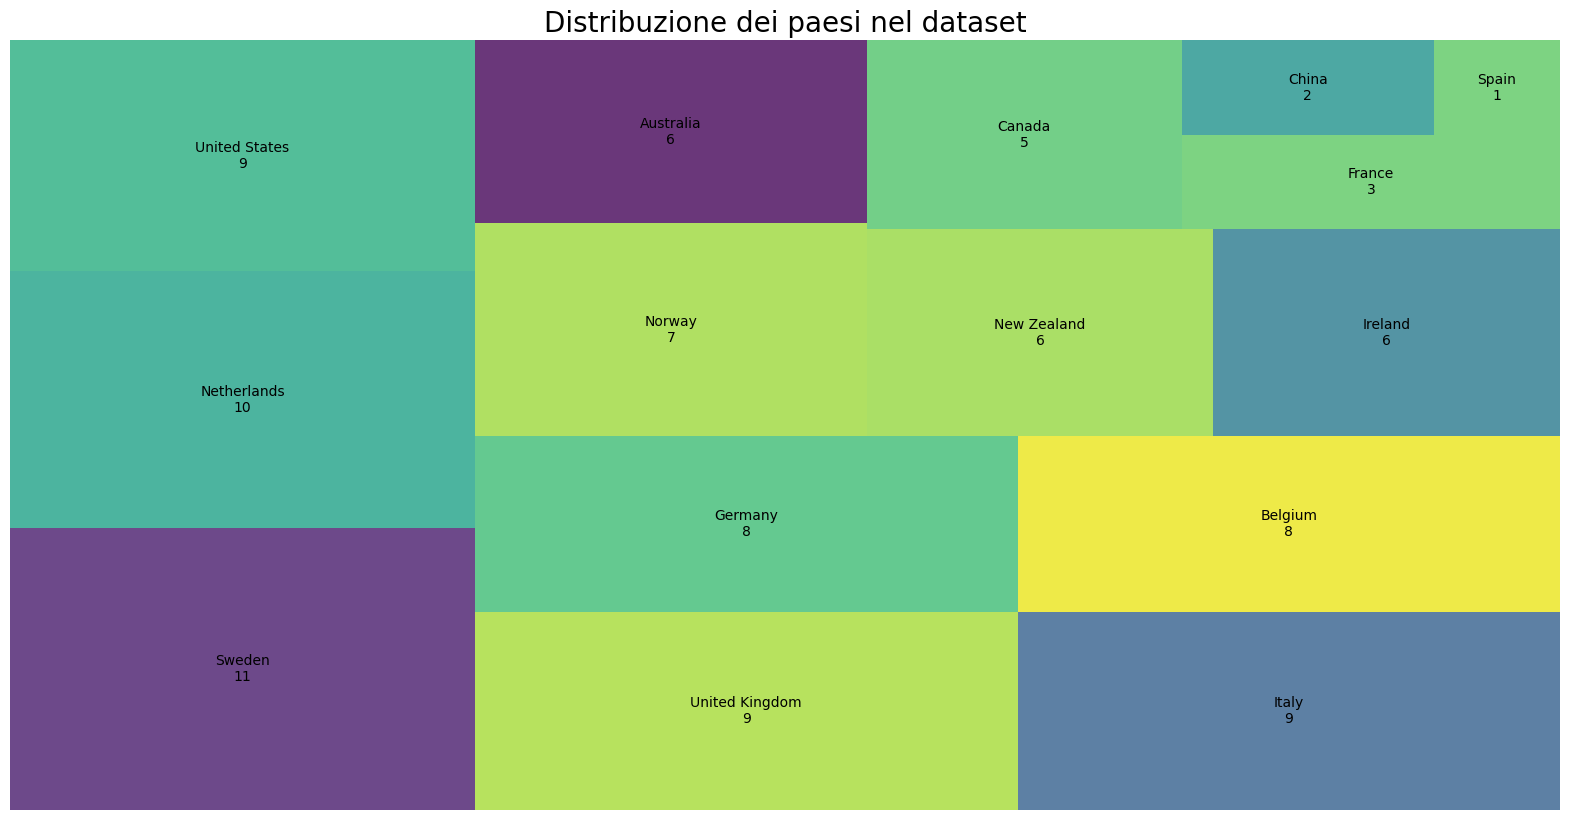

In [7]:

# Creazione del treemap con conteggio nelle etichette
plt.figure(figsize=(20, 10))
squarify.plot(
    sizes=df_companies['country'].value_counts().values,  # Conteggi
    label=[f"{country}\n{count}" for country, count in zip(
        df_companies['country'].value_counts().index, 
        df_companies['country'].value_counts().values
    )],  # Etichette con paese e conteggio
    alpha=0.8
)
plt.title("Distribuzione dei paesi nel dataset", fontsize=20)
plt.axis("off")  # Rimuove gli assi
plt.show()



1.4 Visualización de una variable categorica y una numérica

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16632\3086540791.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='amount', data=df_merged, palette='Set3')


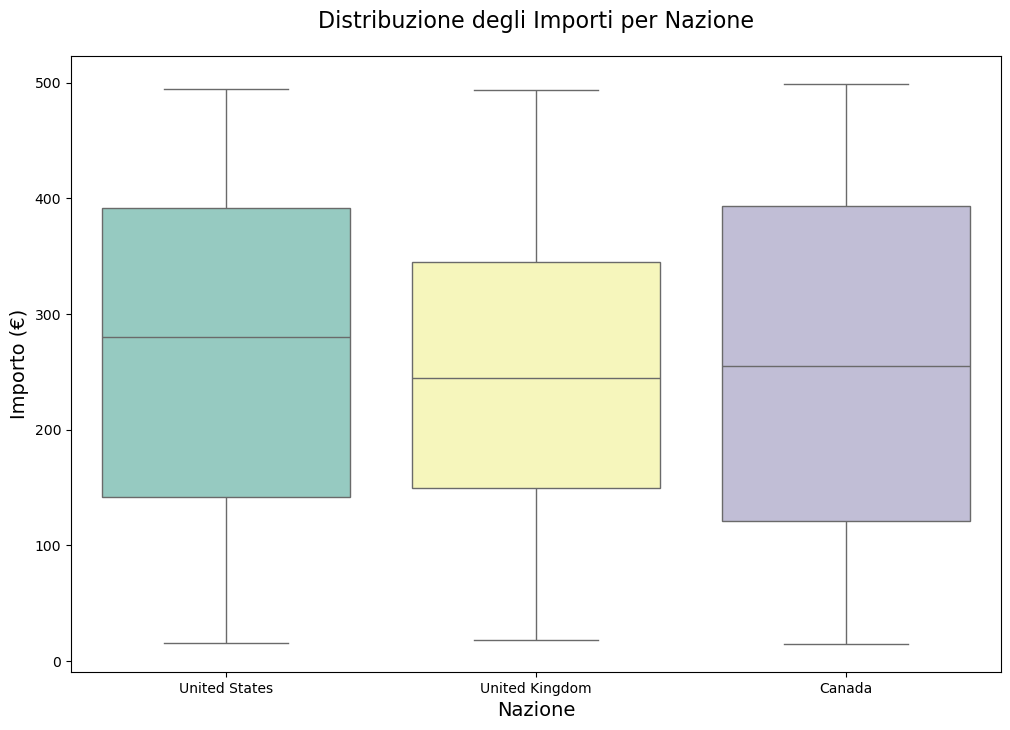

In [22]:
# Unire le tabelle 'transactions' e 'users' usando 'user_id'
df_merged = pd.merge(df_transactions, df_users, left_on='user_id', right_on='id', how='left')

# Creazione del boxplot
plt.figure(figsize=(12, 8))

sns.boxplot(x='country', y='amount', data=df_merged, palette='Set3')

# Personalizzazione del grafico
plt.title('Distribuzione degli Importi per Nazione', fontsize=16, pad=20)
plt.xlabel('Nazione', fontsize=14)
plt.ylabel('Importo (€)', fontsize=14)

# Mostra il grafico
plt.show()


1.5 Visualización de dos variables categoricas

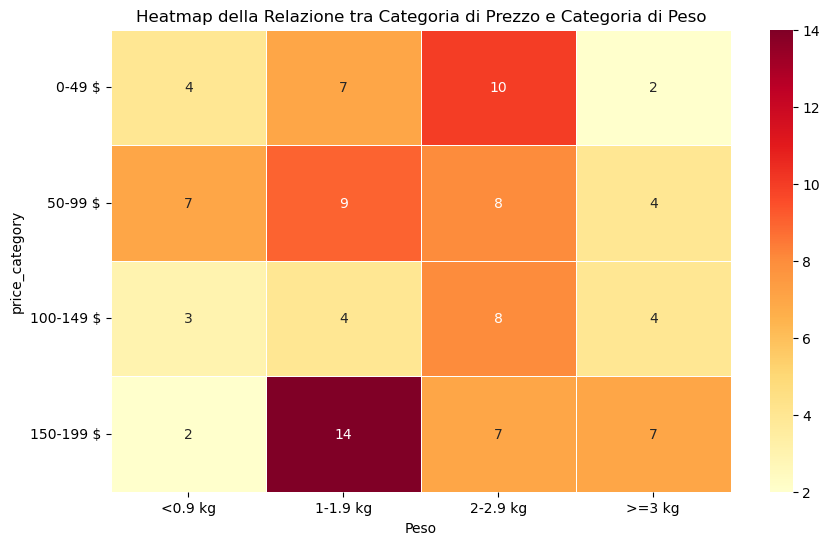

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creazione della categoria per peso
df_products['weight_category'] = pd.cut(df_products['weight'], bins=[0, 0.9, 1.9, 2.9, 3.9], labels=['<0.9 kg', '1-1.9 kg', '2-2.9 kg', '>=3 kg'], right=True)

# Creazione della categoria per prezzo
df_products['price_numeric'] = df_products['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_products['price_category'] = pd.cut(df_products['price_numeric'], bins=range(0, int(df_products['price_numeric'].max()) + 50, 50), labels=[f'{i}-{i+49} $' for i in range(0, int(df_products['price_numeric'].max()), 50)])

# Creazione della tabella di contingenza heatmap tra 'weight_category' e 'price_category'
heatmap = pd.crosstab(df_products['price_category'], df_products['weight_category'])

# Creazione della heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, cmap='YlOrRd', fmt='d', linewidths=0.5, cbar=True, yticklabels=True)

# Aggiungi titolo
plt.title('Heatmap della Relazione tra Categoria di Prezzo e Categoria di Peso')

# Personalizza le etichette sull'asse Y
plt.yticks(rotation=0)  # Ruota le etichette dell'asse Y in orizzontale
plt.xlabel('Peso')  # Titolo dell'asse Y più chiaro

# Mostra la heatmap
plt.show()


1.6 Visualización de tres variables 

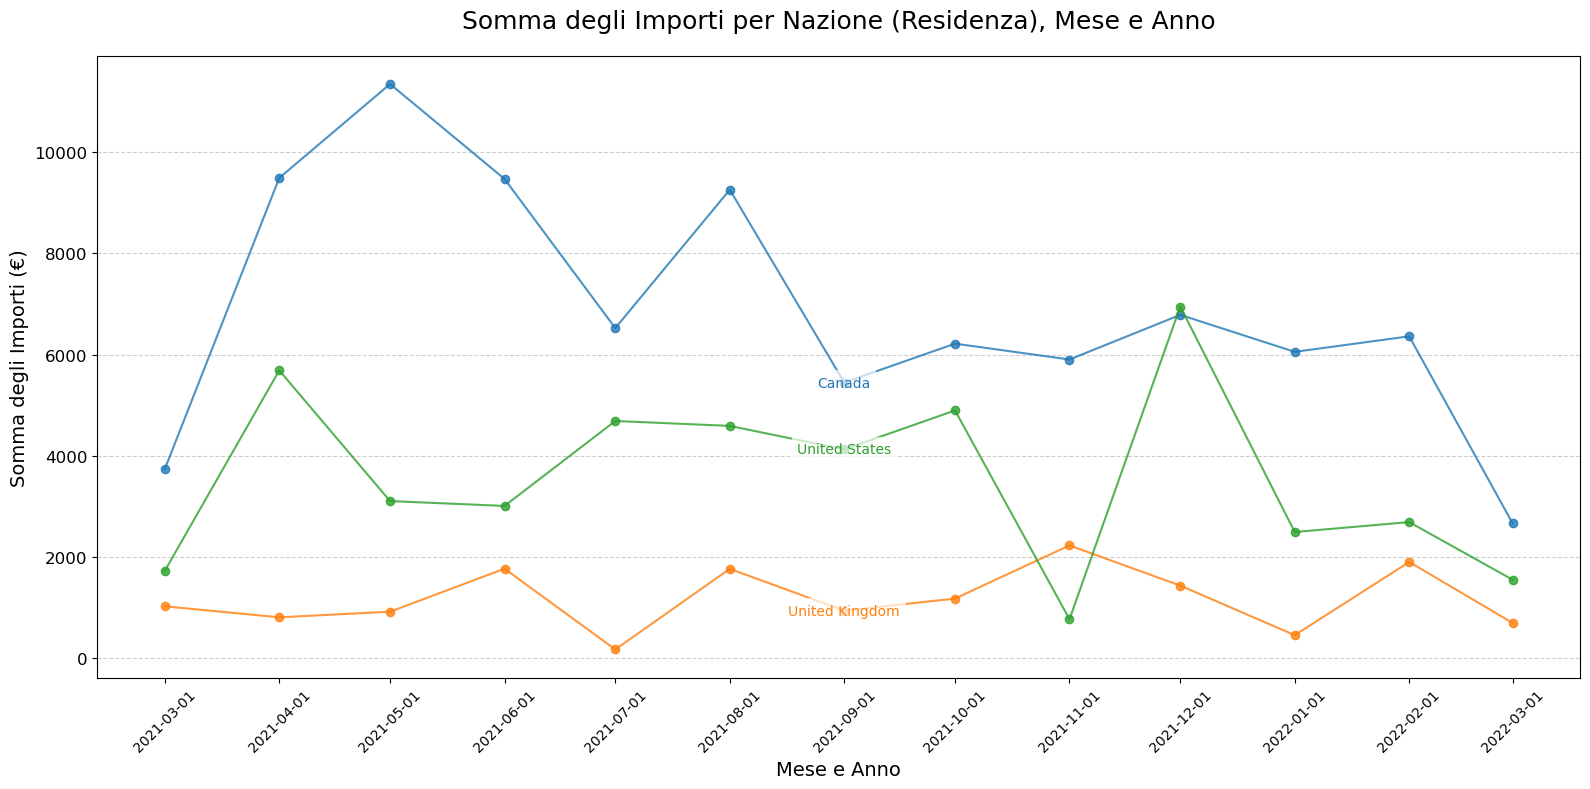

In [36]:
"""Visualización de tres variables como line plot con Matplotlib"""

import pandas as pd
import matplotlib.pyplot as plt

# Convertire la colonna timestamp in oggetto datetime e creare colonne "year" e "month"
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])
df_transactions['year'] = df_transactions['timestamp'].dt.year
df_transactions['month'] = df_transactions['timestamp'].dt.month

# Unire le tabelle 'transactions' e 'users' usando 'user_id'
df_merged = pd.merge(
    df_transactions,  # Tabella delle transazioni
    df_users,         # Tabella degli utenti
    left_on='user_id',  # Colonna nella tabella transactions
    right_on='id',  # Colonna nella tabella users
    how='left'  # Unione sinistra per mantenere tutte le transazioni
)

# Calcolare la somma degli amount per nazione (residenza), anno e mese
df_grouped = df_merged.groupby(['country', 'year', 'month'])['amount'].sum().reset_index()

# Creare una nuova colonna combinata "year_month" per una rappresentazione continua dei dati
df_grouped['year_month'] = pd.to_datetime(df_grouped[['year', 'month']].assign(day=1))

# Creazione del grafico a linee
plt.figure(figsize=(16, 8))

for country in df_grouped['country'].unique():
    country_data = df_grouped[df_grouped['country'] == country]
    line, = plt.plot(
        country_data['year_month'],  # Mese e anno sull'asse X
        country_data['amount'],  # Somma degli importi sull'asse Y
        marker='o',  # Aggiungere punti sulle linee
        label=country,  # Etichetta della nazione
        alpha=0.8
    )
    
    # Determinare una posizione strategica: inizio, fine o punto medio
    num_points = len(country_data)
    if num_points > 2:
        random_idx = num_points // 2  # Posizione centrale se ci sono più di due punti
    else:
        random_idx = 0 if num_points == 1 else -1  # Inizio o fine
    
    x_pos = country_data['year_month'].iloc[random_idx]
    y_pos = country_data['amount'].iloc[random_idx]
    
    # Posizionare il nome della nazione sulla linea con colore corrispondente
    plt.text(
        x_pos,  # Posizione sull'asse X
        y_pos,  # Posizione sull'asse Y
        country,  # Nome della nazione
        fontsize=10,
        color=line.get_color(),  # Stesso colore della linea
        ha='right' if random_idx == 0 else ('left' if random_idx == -1 else 'center'),
        va='center',  # Allineamento verticale
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # Sfondo per leggibilità
    )

# Personalizzazione del grafico
plt.title('Somma degli Importi per Nazione (Residenza), Mese e Anno', fontsize=18, pad=20)
plt.xlabel('Mese e Anno', fontsize=14)
plt.ylabel('Somma degli Importi (€)', fontsize=14)
plt.xticks(
    df_grouped['year_month'].dt.strftime('%Y-%m').unique(), 
    fontsize=10, 
    rotation=45
)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Migliorare il layout
plt.tight_layout()
plt.show()


1.7 Pairplot

TypeError: 'Legend' object is not callable

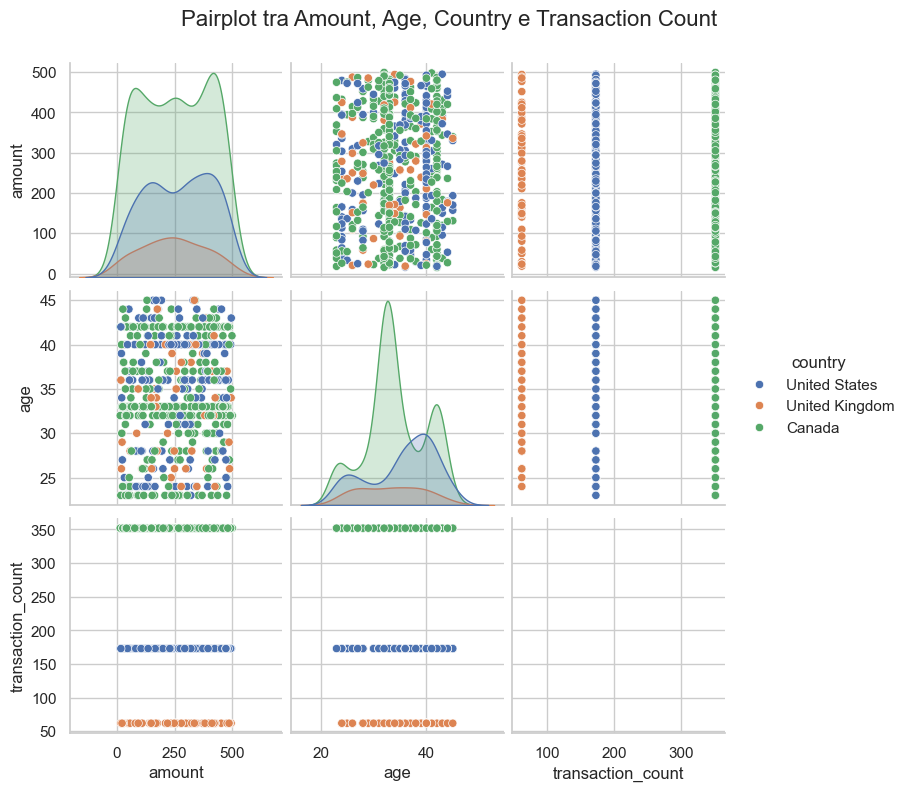

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Convertire la colonna timestamp in oggetto datetime e creare colonna "year"
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])
df_transactions['year'] = df_transactions['timestamp'].dt.year

# Unire le tabelle 'transactions' e 'users' usando 'user_id' e 'id'
df_merged = pd.merge(
    df_transactions,  # Tabella delle transazioni
    df_users,         # Tabella degli utenti
    left_on='user_id',  # Colonna nella tabella transactions
    right_on='id',      # Colonna nella tabella users
    how='left'  # Unione sinistra per mantenere tutte le transazioni
)

# Convertire 'birth_date' in datetime
df_merged['birth_date'] = pd.to_datetime(df_merged['birth_date'], format='%b %d, %Y')

# Calcolare l'età in base alla data di nascita
df_merged['age'] = df_merged['birth_date'].apply(lambda x: (datetime.now() - x).days // 365)

# Calcolare il numero di transazioni per ciascun paese (country)
df_transaction_count = df_merged.groupby('country').size().reset_index(name='transaction_count')

# Unire i dati per includere il conteggio delle transazioni
df_merged = pd.merge(df_merged, df_transaction_count, on='country', how='left')

# Selezionare solo le colonne 'amount', 'age', 'country', 'transaction_count'
df_pairplot = df_merged[['amount', 'age', 'country', 'transaction_count']]

# Creare il pairplot per esplorare le relazioni tra 'amount', 'age', 'country' e 'transaction_count'
g = sns.pairplot(df_pairplot, hue='country', markers='o')

# Personalizzare il grafico
g.fig.suptitle('Pairplot tra Amount, Age, Country e Transaction Count', y=1.05, fontsize=16)

# Posizionare la legenda in alto, al centro, sotto il titolo
g.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False, fontsize=9)

plt.tight_layout()
plt.show()
